# Taller 2: Analisis Frecuencial de Imagenes

En este taller vamos a explorar el analisis frecuencial de imagenes utilizando la transformada de Fourier en Python. Para este analisis necesitaremos las librerias **opencv**, **numpy** y **matplotlib**.

Para realizar el analisis se requieren las funciones **numpy.fft.fft2**, **np.fft.ifft2**, **numpy.fft.fftshift**. En este taller siga los siguientes pasos:

1. Cargue una imagen cualquiera en escala de grises. 
2. Calcule la transformada de Fourier de la imagen con la función **numpy.fft.fft2**
3. Grafique como una imagen la transformada de Fourier, tenga en cuenta que esta produce numeros complejos y buscamos graficar la magnitud.
4. Grafique en escala logaritmica la transformada de Fourier, aplicando la transformacion Magnitud=20$log$[abs(FFT_Imagen)]. ¿Qué diferencia hay entre la gráfica anterior y esta? ¿porqué se observan estas diferencias?
5. Centre el espectro utilizando la función **numpy.fft.fftshift**, Gráfique de nuevo la magnitud del espectro en escala normal y escala logaritmica. ¿Qué diferencias hay y porqué?
6. Elimine la parte central del espectro, colocando valores de cero, use la función **numpy.fft.fftshift** de nuevo para volver al espectro sin corrimiento, y encuentre la imagen transformada utilizando **numpy.fft.fft2**. Es posible que deba extraer solo la parte real del proceso anterior y llevar los valores a formato *uint8*. Gráfique la imagen original y la imagen transformada, ¿Qué observa?, ¿Porqué? ¿Es lo que esperaba?
7. Ahora haga el proceso contrario, deje solo la parte central de la FFT y coloque lo demás en cero. Calcule la transofrmada inversa y grafique la imagen resultante ¿que observa?¿Porqué sucede eso?
8. A la imagen original apliquele un flitro pasa bajos, calcule el espectro de ambas imagenes y comparelos, ¿Qué observa?
9. Ahora agregale ruido gausiano a la imagen y compara los espectros ¿Qué observa?
10. Basado en esto, ¿Cómo puedes diseñar un sistema que permita indicar si una imagen esta difuminada, o si tiene mucho ruido?

Por favor entregar este taller hasta donde hayan logrado realizar al final de la clase **(Viernes 4 de Marzo 2022, 9:00 a.m.)**, pueden hacerse en grupos de dos personas. Disfruten el desarrollo del taller!!!!




In [1]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt

## Pasos:

***1. Cargue una imagen cualquiera en escala de grises***

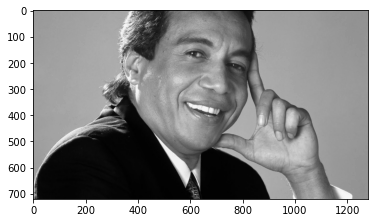

In [2]:
img = cv2.imread('./imgs/diomedes2.jpg')
#img = cv2.imread('./imgs/diomedes.jpeg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap = 'gray')

## Pasos:

***2. Calcule la transformada de fourierde la imagen con la función np.fft.fft2***

In [3]:
transf_img = np.fft.fft2(gray)

## Pasos:

***3. Grafique como una imagen la transformada de Fourier, tenga en cuenta que esta produce numeros complejos y buscamos graficar la magnitud.***

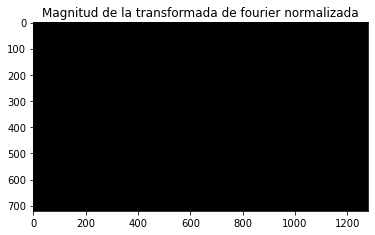

In [4]:
fft_magnitude = np.abs(transf_img)
plt.title("Magnitud de la transformada de fourier normalizada")
plt.imshow(fft_magnitude/np.max(fft_magnitude), cmap='gray')

## Pasos:

***4. Grafique en escala logaritmica la transformada de Fourier, aplicando la transformacion Magnitud=20$log$[abs(FFT_Imagen)]. ¿Qué diferencia hay entre la gráfica anterior y esta? ¿porqué se observan estas diferencias?***


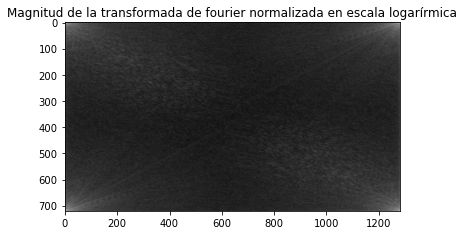

In [5]:
plt.title("Magnitud de la transformada de fourier normalizada en escala logarírmica")
plt.imshow(20*np.log(fft_magnitude/np.max(fft_magnitude) + 0.00001), cmap='gray')

Ambas imágenes son distintas porque los valores de las magnitudes son muy pequeños y también cercanos entre sí, entonces al aplicar logaritmo a la magnitud de la fft, logramos espaciar mejor las magnitudes de la fft generando más contraste visualmente. Esto además del escalamiento por la constante $20$ hace que sí se pueda ver la imagen más claramente.

## Pasos:

***5. Centre el espectro utilizando la función np.fft.fftshift, Gráfique de nuevo la magnitud del espectro en escala normal y escala logaritmica. ¿Qué diferencias hay y porqué?***

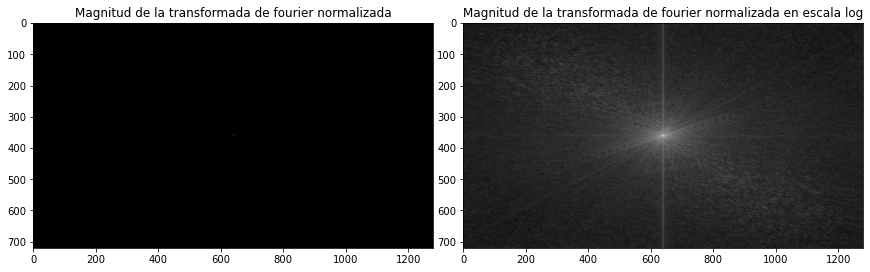

In [6]:
shifted_fft = np.fft.fftshift(transf_img)
shifted_fft_mag = np.abs(shifted_fft)

fig, axs = plt.subplots(1, 2, figsize=(12,12))
fig
axs[0].set_title("Magnitud de la transformada de fourier normalizada")
axs[1].set_title("Magnitud de la transformada de fourier normalizada en escala log")

axs[0].imshow(shifted_fft_mag, cmap='gray')
axs[1].imshow(20*np.log( 0.00001 + (shifted_fft_mag/np.max(shifted_fft_mag)) ),
              cmap='gray')

plt.tight_layout(pad=0.4)
plt.show()

Nuevamente las diferencias que notamos entre la  **Magnitud de la transformada de fourier normalizada** y **Magnitud de la transformada de fourier normalizada en escala log**, se dan por los efectos del logaritmo discutidos anteriormente. La diferencia con respecto a su versión sin *shift* **[PREGUNTAR]()**

## Pasos:

***6. Elimine la parte central del espectro, colocando valores de cero, use la función numpy.fft.fftshift de nuevo para volver al espectro sin corrimiento, y encuentre la imagen transformada utilizando numpy.fft.fft2. Es posible que deba extraer solo la parte real del proceso anterior y llevar los valores a formato *uint8*. Gráfique la imagen original y la imagen transformada, ¿Qué observa?, ¿Porqué? ¿Es lo que esperaba?***

In [7]:
winSize = 3
shifted_fft_cp = shifted_fft.copy()
nrows, ncols = shifted_fft_cp.shape

center_row = np.floor(nrows/2).astype('int32')
center_col = np.floor(ncols/2).astype('int32')

shifted_fft_cp[center_row - winSize:center_row + winSize,
               center_col - winSize:center_col + winSize] = 0


unshifted_fft = np.fft.fftshift(shifted_fft_cp)
transformed_img = np.fft.ifft2(unshifted_fft)

*Ploteamos los resultados*

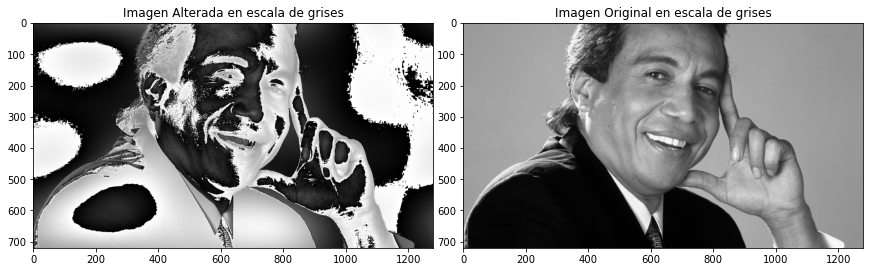

In [8]:
fig2, axs2 = plt.subplots(1, 2, figsize=(12,12))

axs2[0].set_title("Imagen Alterada en escala de grises")
axs2[1].set_title("Imagen Original en escala de grises")

axs2[0].imshow(np.real(transformed_img).astype('uint8'), cmap='gray')
axs2[1].imshow(gray, cmap='gray')

plt.tight_layout(pad=0.4)
plt.show()

## Pasos:

***7. Ahora haga el proceso contrario, deje solo la parte central de la FFT y coloque lo demás en cero. Calcule la transofrmada inversa y grafique la imagen resultante ¿que observa?¿Porqué sucede eso?***

In [9]:
winSize2 = 20

shifted_fft_cp2 = shifted_fft.copy()
nrows2, ncols2 = shifted_fft_cp2.shape

center_row2 = np.floor(nrows/2).astype('int32')
center_col2 = np.floor(ncols/2).astype('int32')

mask = np.zeros((nrows2, ncols2))
mask[center_row - winSize2:center_row + winSize2,
     center_col - winSize2:center_col + winSize2] = 1

unshifted_fft2 = np.fft.fftshift( np.multiply(shifted_fft_cp2, mask) )
transformed_img2 = np.fft.ifft2(unshifted_fft2)

*Ploteamos los resultados:*

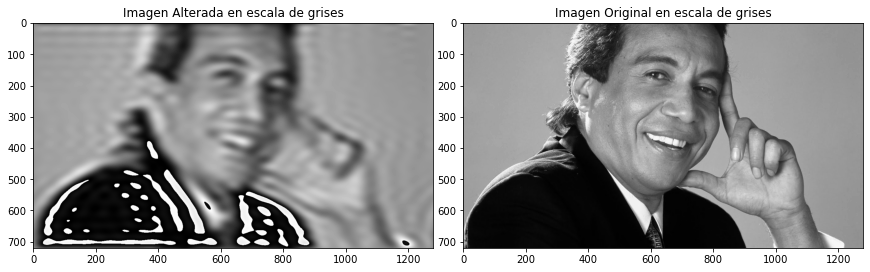

In [10]:
fig3, axs3 = plt.subplots(1, 2, figsize=(12,12))

axs3[0].set_title("Imagen Alterada en escala de grises")
axs3[1].set_title("Imagen Original en escala de grises")

axs3[0].imshow(np.real(transformed_img2).astype('uint8'), cmap='gray')
axs3[1].imshow(gray, cmap='gray')

plt.tight_layout(pad=0.4)
plt.show()

***8. A la imagen original apliquele un flitro pasa bajos, calcule el espectro de ambas imagenes y comparelos, ¿Qué observa?***